# Preparing our data

As we get ready to apply a classifier in the wild, let's start by loading the data we want to learn to classify. We'll start with a classic example of iris flower classification. We'll begin by using two features for each observation: sepal width and petal width. Let's take a look at the content of the data:


In [12]:
import pandas as pd

raw_data = pd.read_csv("data/iris.csv")
raw_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


We can see that we have four features: sepal length, sepal width, petal length, and petal width. We also have the target variable: species. There are 150 observations. Let's also see how many unique target variables we have and how many observations there are for each type. To accomplish this, we can use the `unique()` and `value_counts()` methods for a pandas series.

In [13]:
raw_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
raw_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

From this we see that we have three target variable classes and that the classes are balanced.

Now that we've reviewed the data, let's select from this just sepal width and petal width which we'll use for classification and, of course, the target variable species:

In [15]:
data = raw_data[["SepalWidthCm", "PetalWidthCm", "Species"]]
data

,SepalWidthCm,PetalWidthCm,Species
0,3.5,0.2,Iris-setosa
1,3.0,0.2,Iris-setosa
2,3.2,0.2,Iris-setosa
3,3.1,0.2,Iris-setosa
4,3.6,0.2,Iris-setosa
...,...,...,...
145,3.0,2.3,Iris-virginica
146,2.5,1.9,Iris-virginica
147,3.0,2.0,Iris-virginica
148,3.4,2.3,Iris-virginica


It's always important to inspect the data. If we check these over for missing values, `NaN` values, etc. we find that there are no issues like that. Let's also visualize the data to check for outliers or any other issues. To do so, let's make two plots: (1) a scatterplot of the the data with the markers styled by the target variable (species) and (2) a histogram of each of the two feature variables we'll be using: sepal width and petal width. Let's start with the scatter plot:

Text(0, 0.5, 'Sepal Width (cm)')

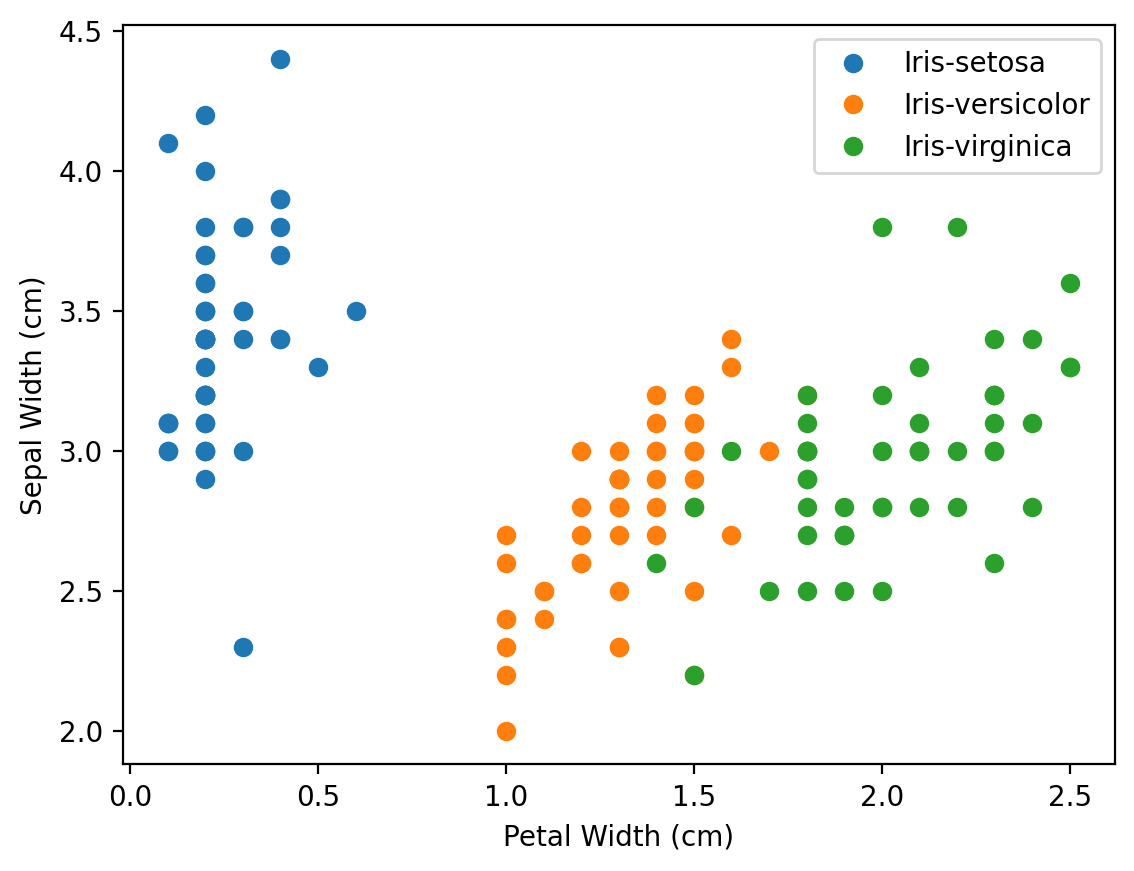

In [16]:
%config InlineBackend.figure_format = 'retina' # Optional Jupyter Notebook command for high resolution plots

import matplotlib.pyplot as plt

# Get each unique type of label
class_labels = data['Species'].unique()

fig, ax = plt.subplots()

# Loop through each of the class labels and plot them
for label in class_labels:
    # Get the data that have that label
    data_subset = data.loc[data['Species'] == label]
    ax.plot(data_subset['PetalWidthCm'],data_subset['SepalWidthCm'],linestyle='',marker='o',label=label)
ax.legend()
ax.set_xlabel('Petal Width (cm)')
ax.set_ylabel('Sepal Width (cm)')

One thing seems clear from the data, the Iris-setosa species have considerably different attributes from the versicolor and virginica varieties. This indicates it may be easier to classify Iris-setosa than the other two., but overall, these are decently well-separated in feature space. 

Next, let's histogram the two features we've included: petal width and sepal width

Text(0, 0.5, 'Count')

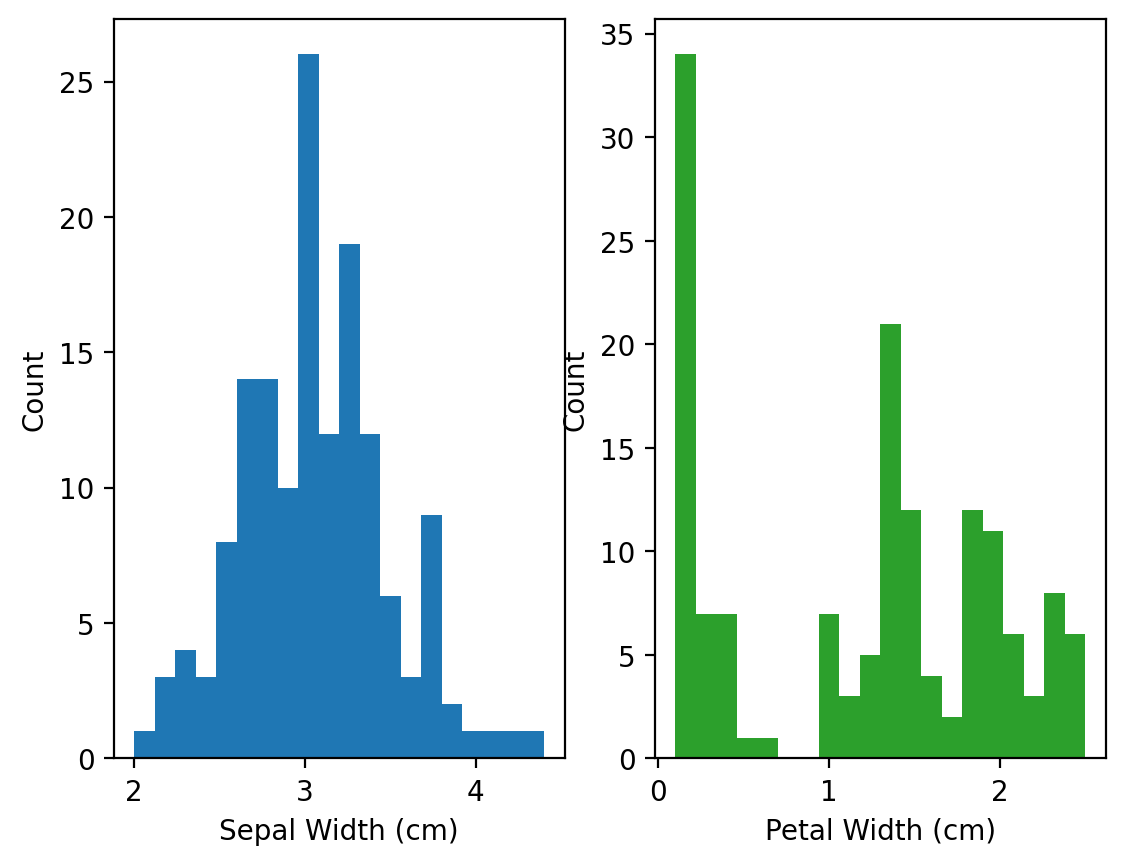

In [17]:
fig, (ax_sepal_hist, ax_petal_hist) = plt.subplots(1, 2)

ax_sepal_hist.hist(
    data["SepalWidthCm"],
    bins=20,
    color="tab:blue",
)
ax_sepal_hist.set_xlabel("Sepal Width (cm)")
ax_sepal_hist.set_ylabel("Count")

ax_petal_hist.hist(
    data["PetalWidthCm"],
    bins=20,
    color="tab:green",
)
ax_petal_hist.set_xlabel("Petal Width (cm)")
ax_petal_hist.set_ylabel("Count")

Not only does exploring our data provide a way of identifying potential errors in the data, it also provides a sense of how the data are distributed and, as discussed with respect to the scatter plot above, it provides some underlying intuition into how hard the classification problem is.

## Splitting the data into training and test datasets

When applying classification and regression for prediction we can NEVER use the same dataset to train our model as we do to evaluate its performance. The goal of prediction is to generalize what is learned from the training data to unseen data and the best way to evaluate that is to hold out data that are NOT included in the training set for the test set and use that to evaluate performance.

Let's do that here. We'll divide up our data into a separate training and test dataset. We'll use 70% (or 0.7 $\times$ 150 = 105 observations) of our data for training and the rest (45 observations) for our test dataset. When we split our data, however, we want to make sure that we randomly split it. Notice that the species types are grouped together in the original data above? It starts with all the Iris-setosa class and then ends with all the Iris-virginica class? If we don't randomize our data, our training dataset may have all flowers of one or two species and our test data of an entirely different species. This would make our training and test datasets very imbalanced in their class, and that's undesirable for training a model.

Given that, we'll start by randomizing the order of the data then separating the first 105 observations as training and the last 45 observations as test data.

To randomize the order of the data we COULD add in a column of random numbers then sort the dataframe by that column. However, pandas offers us a simpler solution through the `sample()` method, which if we set the keyword parameter `frac` to 1, we achieve the desired result:

In [18]:
data_randomized = data.sample(frac=1)
data_randomized

,SepalWidthCm,PetalWidthCm,Species
19,3.8,0.3,Iris-setosa
125,3.2,1.8,Iris-virginica
126,2.8,1.8,Iris-virginica
62,2.2,1.0,Iris-versicolor
59,2.7,1.4,Iris-versicolor
...,...,...,...
34,3.1,0.1,Iris-setosa
131,3.8,2.0,Iris-virginica
38,3.0,0.2,Iris-setosa
14,4.0,0.2,Iris-setosa


No, we just need to separate this out into our training and test datasets:

In [19]:
data_train = data_randomized.iloc[:105]
data_train

,SepalWidthCm,PetalWidthCm,Species
19,3.8,0.3,Iris-setosa
125,3.2,1.8,Iris-virginica
126,2.8,1.8,Iris-virginica
62,2.2,1.0,Iris-versicolor
59,2.7,1.4,Iris-versicolor
...,...,...,...
21,3.7,0.4,Iris-setosa
100,3.3,2.5,Iris-virginica
50,3.2,1.4,Iris-versicolor
122,2.8,2.0,Iris-virginica


In [20]:
data_test = data_randomized.iloc[105:]
data_test

,SepalWidthCm,PetalWidthCm,Species
12,3.0,0.1,Iris-setosa
39,3.4,0.2,Iris-setosa
118,2.6,2.3,Iris-virginica
53,2.3,1.3,Iris-versicolor
63,2.9,1.4,Iris-versicolor
8,2.9,0.2,Iris-setosa
73,2.8,1.2,Iris-versicolor
28,3.4,0.2,Iris-setosa
113,2.5,2.0,Iris-virginica
48,3.7,0.2,Iris-setosa


Let's go ahead and save these to csv files for use later:

In [21]:
data_train.to_csv("data/train.csv", index=False)
data_test.to_csv("data/test.csv", index=False)

Now we have all the pieces that we need to apply a classifier to these data. Only we don't have our classification algorithm. It's time for you to code it!